In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open("LivingP.txt") as myfile:
    dfR = pd.DataFrame([], columns=['text'])
    for line in myfile:
        dfR = dfR.append({'text': line}, ignore_index=True)
dfR['flag']='clean'
dfR.head()

,text,flag
0,Trevor Kenneth Rosier (born 14 January 1943) ...,clean
1,Gavin Campbell is an Australian club DJ and re...,clean
2,Lucas Alfonso Orbán Alegre (born 3 February 1...,clean
3,David Rendall (born 11 October 1948) is an Eng...,clean
4,Andrew James Kalen Daish (born 6 September 198...,clean


In [3]:
with open("Autobio.txt") as myfile:
    df2 = pd.DataFrame([], columns=['text'])
    for line in myfile:
        df2 = df2.append({'text': line}, ignore_index=True)
df2['flag']='autobio'
df2.head()

,text,flag
0,"Raymond Fraser ONB (May 8, 1941 – October 22,...",autobio
1,Marsha Forchuk Skrypuch (/ˈskrɪpɪk/ SCRIP-ik; ...,autobio
2,Carl Sassenrath (born 1957 in California) is a...,autobio
3,"A. Charles Muller (born September 19, 1953) is...",autobio
4,Anna Maria Karolina Sundstrand (born 22 Februa...,autobio


In [4]:
dfT = pd.concat((dfR,df2),ignore_index=True)
dfT.head()

,text,flag
0,Trevor Kenneth Rosier (born 14 January 1943) ...,clean
1,Gavin Campbell is an Australian club DJ and re...,clean
2,Lucas Alfonso Orbán Alegre (born 3 February 1...,clean
3,David Rendall (born 11 October 1948) is an Eng...,clean
4,Andrew James Kalen Daish (born 6 September 198...,clean


In [5]:
dfT['text']=dfT["text"].str.replace('[^a-zA-Z0-9 ]', '')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [6]:
dfT.head()

,text,flag
0,Trevor Kenneth Rosier born 14 January 1943 is...,clean
1,Gavin Campbell is an Australian club DJ and re...,clean
2,Lucas Alfonso Orbn Alegre born 3 February 198...,clean
3,David Rendall born 11 October 1948 is an Engli...,clean
4,Andrew James Kalen Daish born 6 September 1984...,clean


In [7]:
dfT['words count'] = dfT['text'].str.count(' ')+1

(0.0, 5000.0)

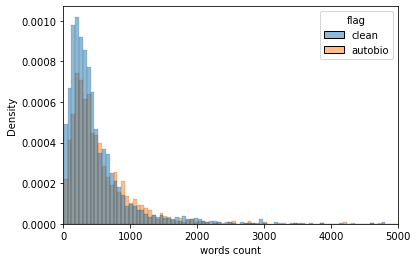

In [8]:
sns.histplot(data=dfT, x="words count", hue="flag", stat='density')
plt.xlim(0,5000)
#plt.ylim(0,0.0001)

<AxesSubplot:xlabel='Word'>

<Figure size 432x288 with 0 Axes>

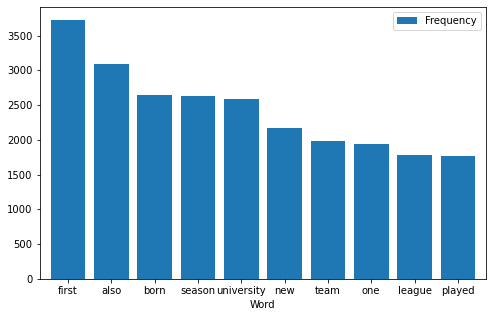

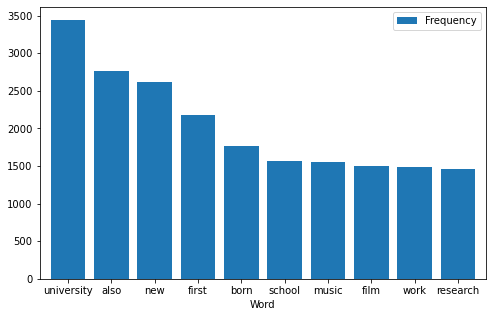

In [18]:
# taken from https://stackoverflow.com/questions/40206249/count-of-most-popular-words-in-a-pandas-dataframe
from collections import Counter
import nltk

top_N = 10

stopwords = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
#clean = df[df['flag']=='clean']
words = (dfT[dfT['flag']=='clean'].text
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

# plot
plt.figure(1)
rslt.plot.bar(rot=0, figsize=(8,5), width=0.8)


words = (dfT[dfT['flag']=='autobio'].text
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')


plt.figure(2)
rslt.plot.bar(rot=0, figsize=(8,5), width=0.8)

# Basic Naive Bayes

In [19]:
X = dfT['text']
y = dfT['flag']

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101,stratify=y)

In [22]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [23]:
nb.fit(X_train,y_train)

MultinomialNB()

In [24]:
predictions = nb.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix,classification_report

In [26]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[398  72]
 [244 356]]


              precision    recall  f1-score   support

     autobio       0.62      0.85      0.72       470
       clean       0.83      0.59      0.69       600

    accuracy                           0.70      1070
   macro avg       0.73      0.72      0.70      1070
weighted avg       0.74      0.70      0.70      1070



# Numbers removed from text

In [27]:
dfT_1 = dfT.copy()
dfT_1['text']=dfT_1["text"].str.replace('\d+', '')
dfT_1.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,text,flag,words count
0,Trevor Kenneth Rosier born January is a for...,clean,251
1,Gavin Campbell is an Australian club DJ and re...,clean,691
2,Lucas Alfonso Orbn Alegre born February is ...,clean,270
3,David Rendall born October is an English ope...,clean,406
4,Andrew James Kalen Daish born September is a...,clean,648


In [28]:
X_1 = dfT_1['text']
y_1 = dfT_1['flag']
cv_1 = CountVectorizer()
X_1 = cv_1.fit_transform(X_1)
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1,test_size=0.3,random_state=101,stratify=y_1)
nb_1 = MultinomialNB()
nb_1.fit(X_1_train,y_1_train)
predictions_1 = nb_1.predict(X_1_test)

In [29]:
print(confusion_matrix(y_1_test,predictions_1))
print('\n')
print(classification_report(y_1_test,predictions_1))

[[393  77]
 [246 354]]


              precision    recall  f1-score   support

     autobio       0.62      0.84      0.71       470
       clean       0.82      0.59      0.69       600

    accuracy                           0.70      1070
   macro avg       0.72      0.71      0.70      1070
weighted avg       0.73      0.70      0.70      1070



# TDIF Transformer

In [30]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [31]:
X = dfT['text']
y = dfT['flag']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101,stratify=y)

In [33]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [34]:
predictions_2 = pipeline.predict(X_test)
print(confusion_matrix(y_test,predictions_2))
print(classification_report(y_test,predictions_2))

[[181 289]
 [ 87 513]]
              precision    recall  f1-score   support

     autobio       0.68      0.39      0.49       470
       clean       0.64      0.85      0.73       600

    accuracy                           0.65      1070
   macro avg       0.66      0.62      0.61      1070
weighted avg       0.66      0.65      0.63      1070



# GridSearch Usage with SVM

From https://scikit-learn.org/dev/auto_examples/model_selection/grid_search_text_feature_extraction.html

In [35]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.pipeline import Pipeline
from time import time

# Define a pipeline combining a text feature extractor with a simple classifier
pipeline = Pipeline(
    [
        ("vect", CountVectorizer()),
        ("tfidf", TfidfTransformer()),
        ("clf", SGDClassifier()),
    ]
)

# Parameters to use for grid search. Uncommenting more parameters will give
# better exploring power but will increase processing time in a combinatorial
# way
parameters = {
    "vect__max_df": (0.5, 0.75, 1.0), # ignore terms with certain frequency
    'vect__max_features': (None, 5000), # only use terms that appear the most 
    'vect__stop_words':('english', None),
    'tfidf__use_idf': (True, False), # weighting terms by how often they appear
    'tfidf__norm': ('l1', 'l2'),
    "clf__max_iter": (20,),
    "clf__alpha": (0.0001, 0.000001),
    "clf__penalty": ("l2", "elasticnet"),
    'clf__max_iter': (100,1000),
}

# Find the best parameters for both the feature extraction and the
# classifier
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
print(parameters)
t0 = time()
grid_search.fit(X, y)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'vect__max_df': (0.5, 0.75, 1.0), 'vect__max_features': (None, 5000), 'vect__stop_words': ('english', None), 'tfidf__use_idf': (True, False), 'tfidf__norm': ('l1', 'l2'), 'clf__max_iter': (100, 1000), 'clf__alpha': (0.0001, 1e-06), 'clf__penalty': ('l2', 'elasticnet')}
Fitting 5 folds for each of 384 candidates, totalling 1920 fits
done in 1598.349s

Best score: 0.723
Best parameters set:
	clf__alpha: 0.0001
	clf__max_iter: 100
	clf__penalty: 'l2'
	tfidf__norm: 'l2'
	tfidf__use_idf: False
	vect__max_df: 1.0
	vect__max_features: None
	vect__stop_words: None


# Neural Network with Tensorflow

https://realpython.com/python-keras-text-classification/

In [36]:
from keras.models import Sequential
from keras import layers
from sklearn.preprocessing import LabelEncoder
X = dfT['text']
y = dfT['flag']
X = cv.transform(X).toarray()
le = LabelEncoder()
le.fit(["clean","autobio"])
y = le.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101,stratify=y)

input_dim = X_train.shape[1]  # Number of features


model = Sequential()
model.add(layers.Dense(20, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2022-08-31 18:31:46.048485: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [37]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', 
               optimizer=opt, 
               metrics=['accuracy'])


In [38]:
history = model.fit(X_train, y_train,
                     epochs=10,
                     verbose=True,
                     validation_data=(X_test, y_test),
                     batch_size=10)

2022-08-31 18:31:47.672877: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
250/250 [==============================] - 17s 24ms/step - loss: 0.6550 - accuracy: 0.6821 - val_loss: 0.5814 - val_accuracy: 0.7159
Epoch 2/10
250/250 [==============================] - 6s 23ms/step - loss: 0.3323 - accuracy: 0.9015 - val_loss: 0.5705 - val_accuracy: 0.7065
Epoch 3/10
250/250 [==============================] - 3s 12ms/step - loss: 0.1391 - accuracy: 0.9788 - val_loss: 0.6177 - val_accuracy: 0.7131
Epoch 4/10
250/250 [==============================] - 3s 11ms/step - loss: 0.0493 - accuracy: 0.9972 - val_loss: 0.7129 - val_accuracy: 0.7056
Epoch 5/10
250/250 [==============================] - 4s 15ms/step - loss: 0.0322 - accuracy: 0.9973 - val_loss: 0.9708 - val_accuracy: 0.6738
Epoch 6/10
250/250 [==============================] - 3s 10ms/step - loss: 0.0179 - accuracy: 0.9992 - val_loss: 0.8725 - val_accuracy: 0.7019
Epoch 7/10
250/250 [==============================] - 2s 10ms/step - loss: 0.0076 - accuracy: 0.9999 - val_loss: 1.0010 - val_accuracy: 0.698

In [39]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9996
Testing Accuracy:  0.6738


In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

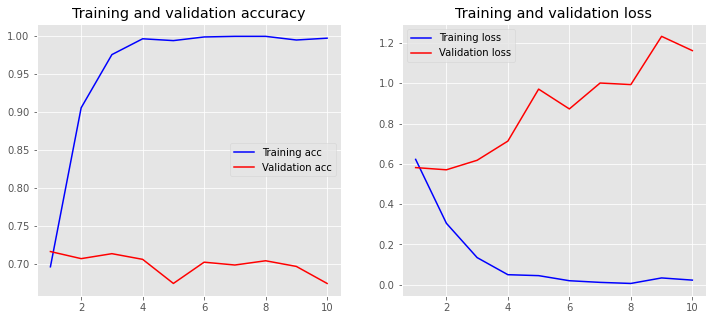

In [41]:
plot_history(history)